In [60]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 

import scipy.stats as st

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix, accuracy_score, auc,roc_curve, roc_auc_score, precision_recall_curve
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('D:\Study\Python\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.EmployeeCount.value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [6]:
df.describe() 

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
# Droping EmployeeCount column as it has only one type of value and EmployeeNumber as it is not useful for the analysis
df.drop(columns=['EmployeeCount' , 'EmployeeNumber'] , inplace = True)

In [8]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,80,1,6,3,3,2,2,2,2


Checking Duplicates

In [9]:
# Assuming df is already defined
print(df.duplicated().value_counts())

# Drop duplicates
df.drop_duplicates(inplace=True)

# Print the length of the DataFrame after removing duplicates
print(len(df))

False    1470
dtype: int64
1470


In [10]:
import pandas as pd

In [11]:
pd.option_context("future.no_silent_downcasting", True)

In [12]:
# pd.set_option('mode.chained_assignment', None)

In [13]:
# Converting Attrition from object to numerical 
df['Attrition'] = df['Attrition'].replace({'Yes':1 , 'No':0})

In [14]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,80,1,6,3,3,2,2,2,2


In [15]:
# Check Duplicate
df.duplicated().sum()

0

In [16]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int

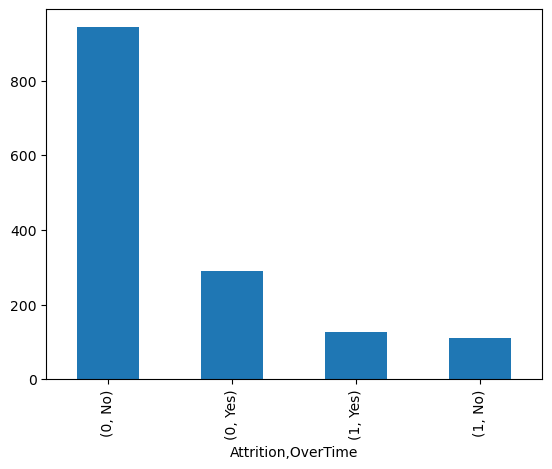

In [17]:
df.groupby('Attrition').OverTime.value_counts().sort_values(ascending = False).plot(kind = 'bar')
plt.show()

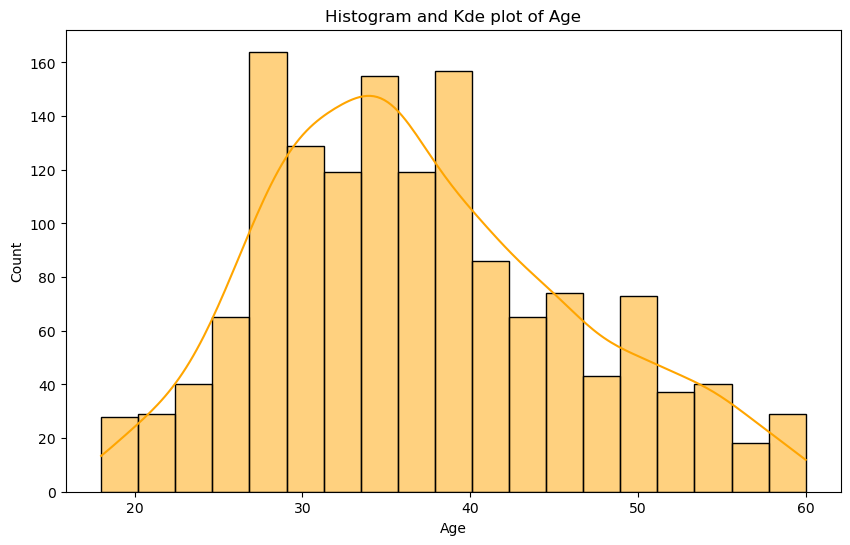

In [18]:
plt.figure(figsize = (10,6))
sns.histplot(df['Age'] , kde = True , color = 'orange')
plt.title('Histogram and Kde plot of Age')
plt.show()
# The data almost have a normal distribution

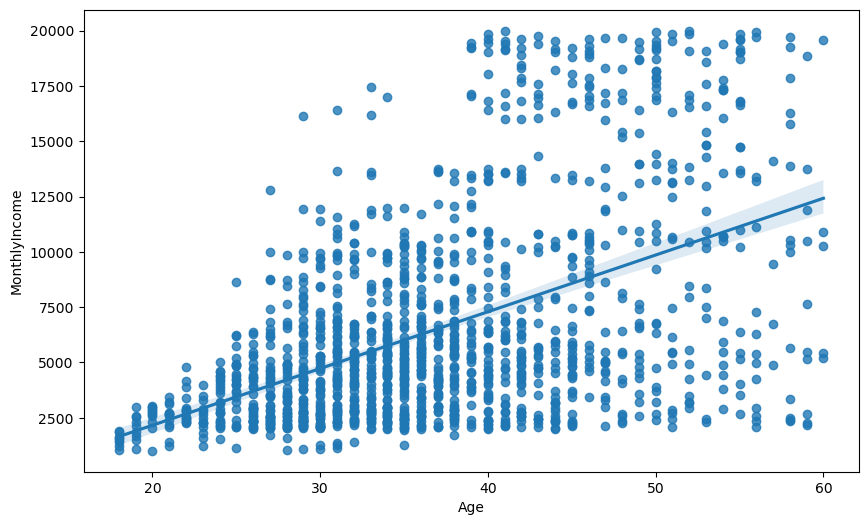

In [19]:
# Age vs MonothlyIncome
plt.figure(figsize = (10,6))
sns.regplot(x = df['Age'] , y = df['MonthlyIncome'])
plt.show()

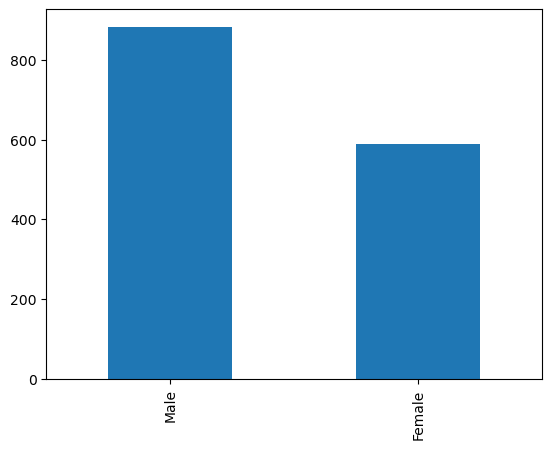

In [20]:
# Gender 
df['Gender'].value_counts().plot(kind = 'bar')
plt.show()
# There are more males than females in this dataset

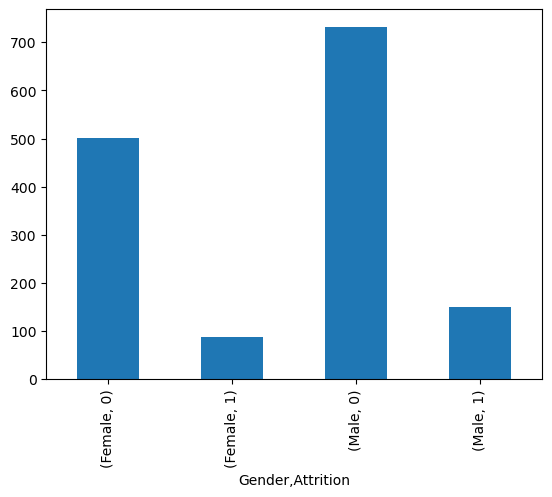

In [21]:
df.groupby('Gender').Attrition.value_counts().plot( kind = 'bar')
plt.show()

In [22]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

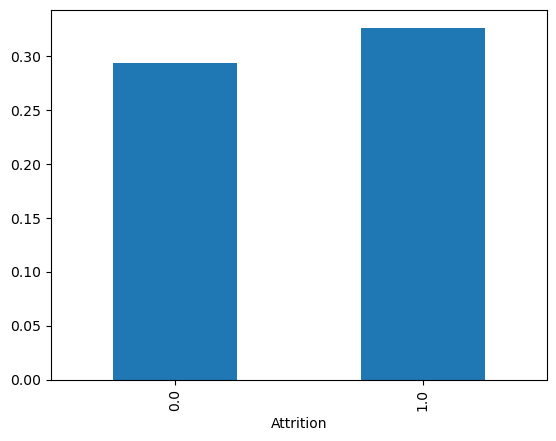

In [53]:
df.groupby('Attrition')['NumCompaniesWorked'].mean().plot(kind = "bar")
plt.show()
# Those who have worked in more places are more likely to leave the company

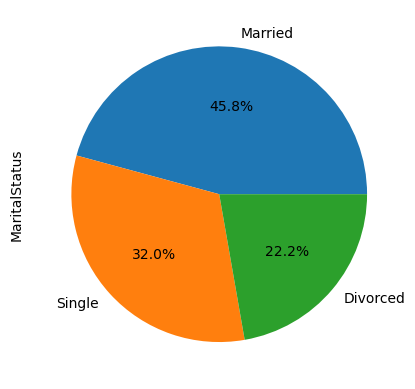

In [23]:
df['MaritalStatus'].value_counts().plot(kind = 'pie' , autopct = "%1.1f%%")
plt.show()

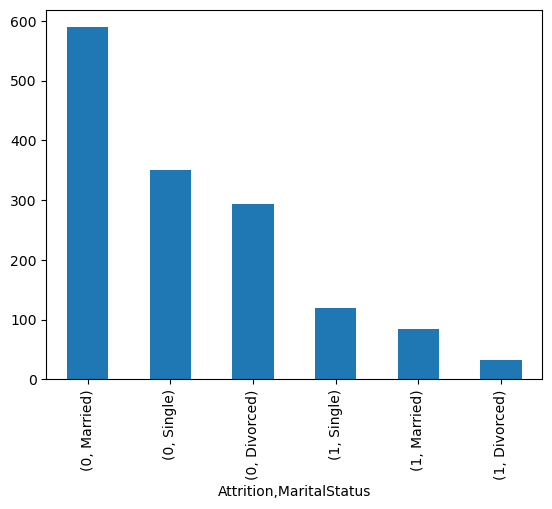

In [24]:
df.groupby('Attrition').MaritalStatus.value_counts().plot(kind = "bar")
plt.show()

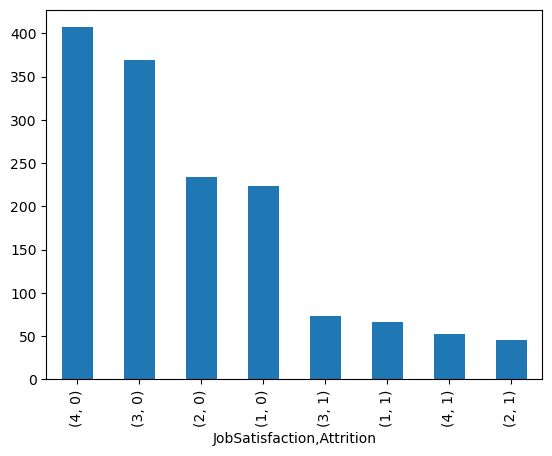

In [25]:
df.groupby('JobSatisfaction').Attrition.value_counts().sort_values(ascending = False).plot(kind = "bar")
plt.show()

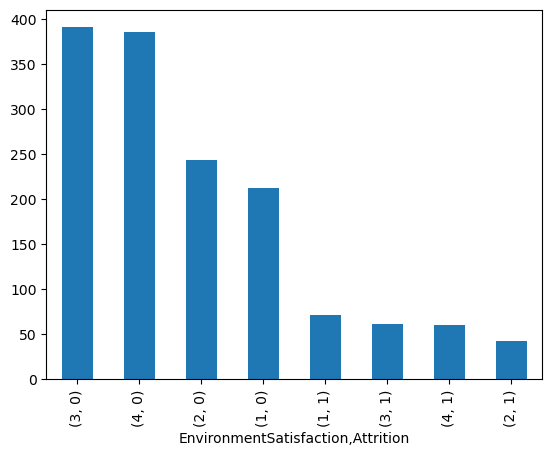

In [26]:
df.groupby('EnvironmentSatisfaction').Attrition.value_counts().sort_values(ascending = False).plot(kind = "bar")
plt.show()

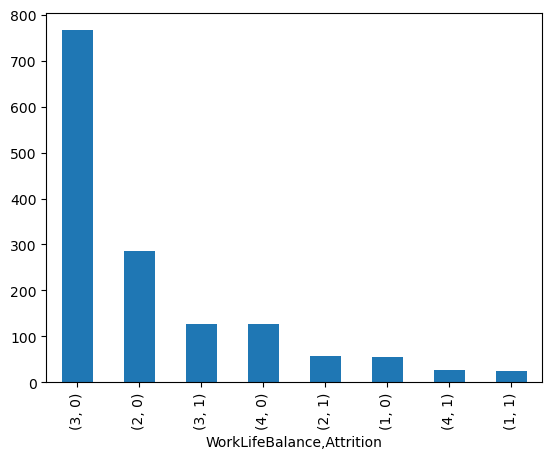

In [27]:
df.groupby('WorkLifeBalance').Attrition.value_counts().sort_values(ascending = False).plot(kind = "bar")
plt.show()

In [28]:
df.groupby('Attrition')['Age'].mean()
# Younger people are more likely to leave the company

Attrition
0    37.561233
1    33.607595
Name: Age, dtype: float64

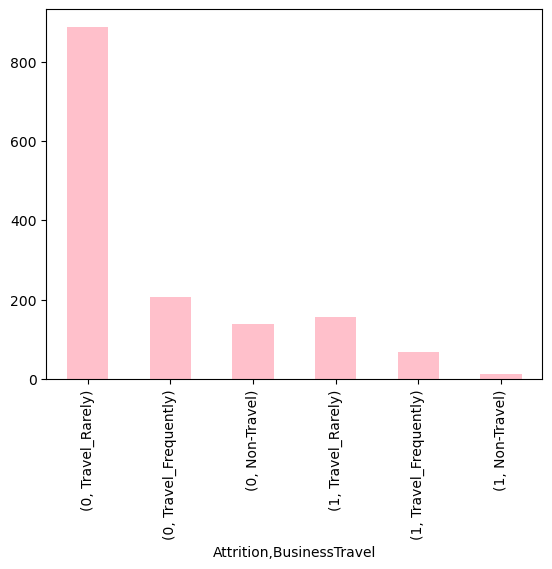

In [29]:
df.groupby('Attrition')['BusinessTravel'].value_counts().plot(kind ='bar' ,color = 'pink')
plt.show()

'Data Transformation

In [31]:
df['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

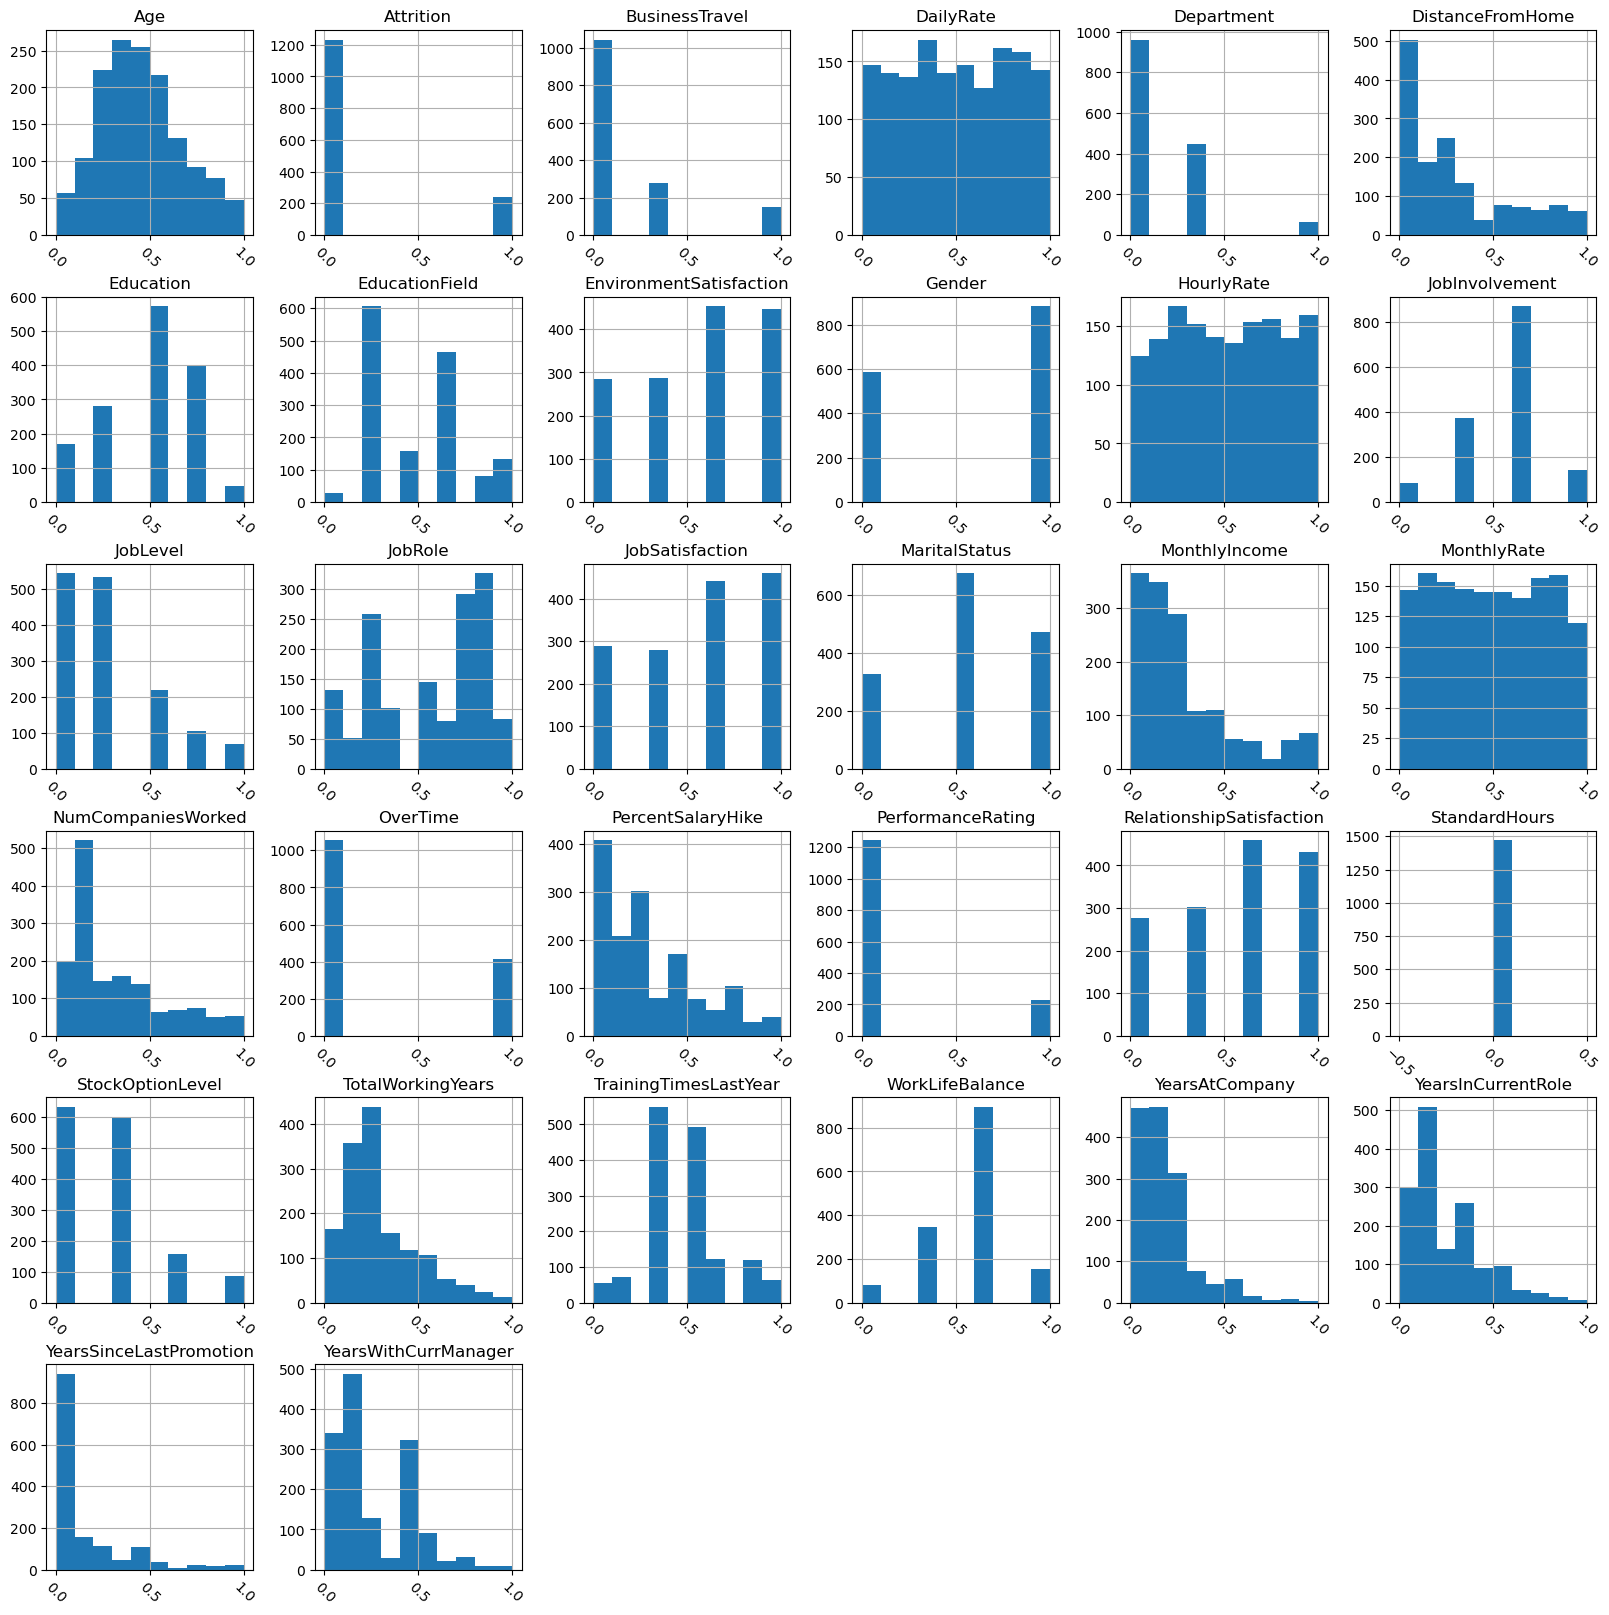

In [54]:
df.hist(figsize=(20, 20), xrot=-45)
plt.show()

In [32]:
df.drop(columns=['Over18'] , inplace = True)

In [33]:
df['Attrition'] = df['Attrition'].astype('int64')
df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [34]:
df['BusinessTravel'] = df['BusinessTravel'].replace({'Travel_Rarely':0 ,'Travel_Frequently':1 , 'Non-Travel':3})

In [35]:
df['BusinessTravel'] = df['BusinessTravel'].astype('int64')
df['Department'] = df['Department'].replace({'Research & Development':0 ,'Sales':1 , 'Human Resources':3})
df['Department'] = df['Department'].astype('int64')

In [36]:
# Encoding column manually will be a time consuming task so i am using LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [37]:
df['EducationField'] = encoder.fit_transform(df['EducationField'])
df['Gender'] = encoder.fit_transform(df['Gender'])
df['JobRole'] = encoder.fit_transform(df['JobRole'])
df['MaritalStatus'] = encoder.fit_transform(df['MaritalStatus'])
df['OverTime'] = encoder.fit_transform(df['OverTime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int32
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int32
 14  JobSatisfaction           1470 non-null 

# converted all the columns to into for model building

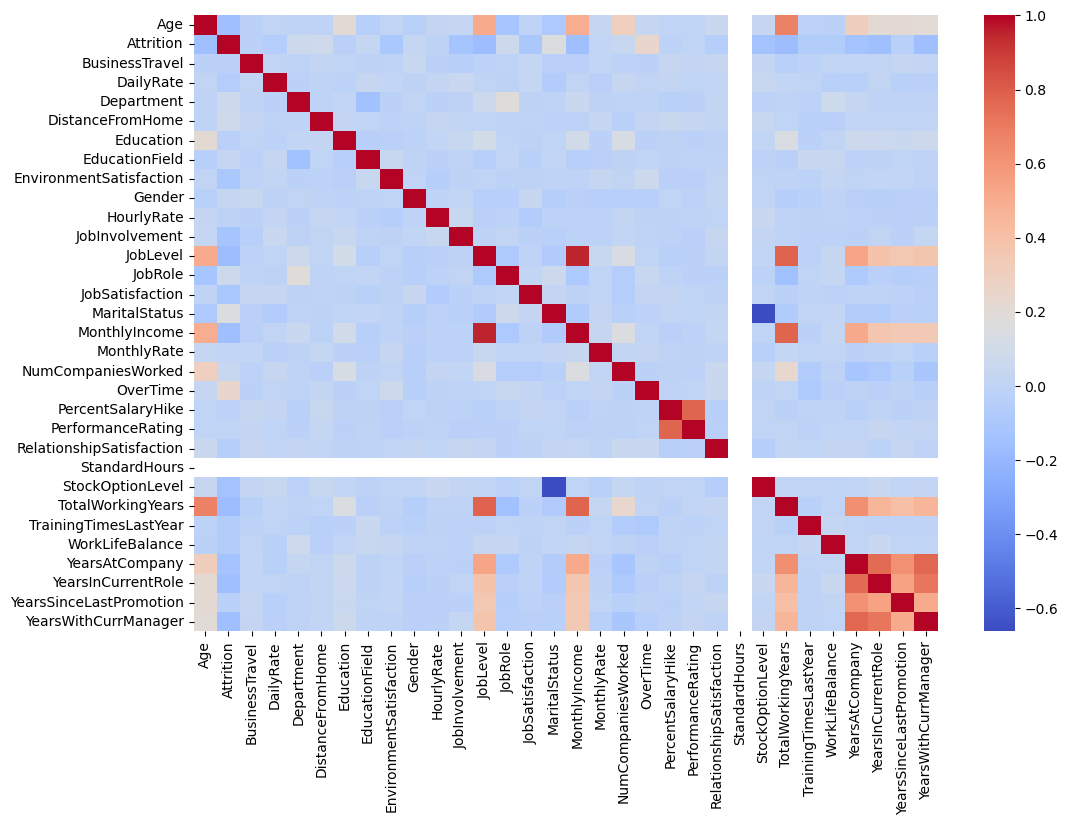

In [38]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr() , cmap = 'coolwarm')
plt.show()

# Model Building and Evaluation

In [39]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0,1102,1,1,2,1,2,0,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,0,8,1,1,3,1,...,4,80,1,10,3,3,10,7,1,7
2,37,1,0,1373,0,2,2,4,4,1,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,0,3,4,1,4,0,...,3,80,0,8,3,3,8,7,3,0
4,27,0,0,591,0,2,1,3,1,1,...,4,80,1,6,3,3,2,2,2,2


In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,1.0,0.000000,0.715820,0.333333,0.000000,0.25,0.2,0.333333,0.0,...,0.000000,0.0,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118
1,0.738095,0.0,0.333333,0.126700,0.000000,0.250000,0.00,0.2,0.666667,1.0,...,1.000000,0.0,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765
2,0.452381,1.0,0.000000,0.909807,0.000000,0.035714,0.25,0.8,1.000000,1.0,...,0.333333,0.0,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000
3,0.357143,0.0,0.333333,0.923407,0.000000,0.071429,0.75,0.2,1.000000,0.0,...,0.666667,0.0,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000
4,0.214286,0.0,0.000000,0.350036,0.000000,0.035714,0.00,0.6,0.000000,1.0,...,1.000000,0.0,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647


# Logistic Regression Model, Decision Tree Model , Random Forest Model 

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

X = df.drop('Attrition', axis=1)
y = df['Attrition']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),

}

for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2)
    print(f"Classifier: {clf_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"F2 Score: {f2:.2f}")
    print("---------------------------")



Classifier: Decision Tree
Accuracy: 0.78
Precision: 0.20
Recall: 0.21
F1 Score: 0.20
F2 Score: 0.20
---------------------------
Classifier: Random Forest
Accuracy: 0.87
Precision: 0.67
Recall: 0.10
F1 Score: 0.18
F2 Score: 0.12
---------------------------
Classifier: Logistic Regression
Accuracy: 0.89
Precision: 0.79
Recall: 0.28
F1 Score: 0.42
F2 Score: 0.32
---------------------------


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

X = df.drop('Attrition', axis=1)
y = df['Attrition']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=60)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
    
    
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2)

print("---------------------------")
print("Random Forest")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"F2 Score: {f2:.2f}")
print("---------------------------")

---------------------------
Random Forest
Accuracy: 0.94
Precision: 0.96
Recall: 0.93
F1 Score: 0.95
F2 Score: 0.94
---------------------------


# Plotting ROC Curves

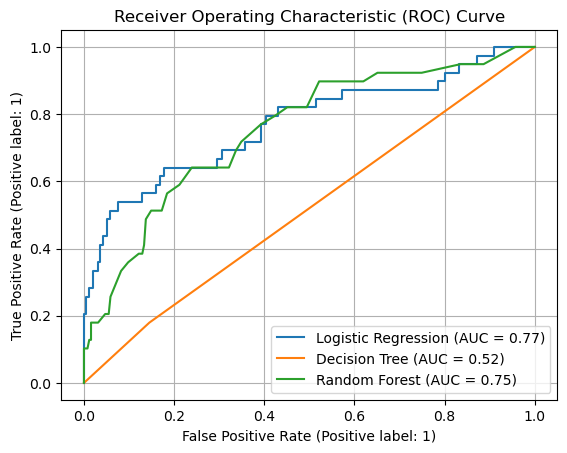

In [43]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
X = df.drop('Attrition', axis=1)
y = df['Attrition']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
}
clf_name1 = "Logistic Regression"
clf1 = classifiers["Logistic Regression"] 

clf_name2 = "Decision Tree"
clf2 = classifiers["Decision Tree"]  # Assuming classifiers is your dictionary of classifiers

clf_name3 = "Random Forest"
clf3 = classifiers["Random Forest"]  # Assuming classifiers is your dictionary of classifiers
# Plotting for classifier 1
clf1.fit(X_train, y_train)
y_score = clf1.predict_proba(X_test)[:, 1]
#fpr, tpr, thresholds = RocCurveDisplay.from_estimator(clf, y_test, y_score)
RocCurveDisplay.from_estimator(clf1, X_test, y_test, ax=plt.gca(), name="Logistic Regression")

# Plotting for classifier 2
clf2.fit(X_train, y_train)
y_score = clf2.predict_proba(X_test)[:, 1]
RocCurveDisplay.from_estimator(clf2, X_test, y_test, ax=plt.gca(), name="Decision Tree")
# Plotting for classifier 3
clf3.fit(X_train, y_train)
y_score = clf3.predict_proba(X_test)[:, 1]
RocCurveDisplay.from_estimator(clf3, X_test, y_test, ax=plt.gca(), name="Random Forest")
# Customize labels and title
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Study the Results

# Example results

Accuracy: Evaluate the model's accuracy on the test set to gauge overall performance.
Precision and Recall: Assess precision (accuracy of positive predictions) and recall (true positive rate) to understand model effectiveness in classifying 'Attrition' or other outcomes.
Confusion Matrix: Analyze the confusion matrix to see how well the model predicts each class (true positives, false positives, true negatives, false negatives).
Feature Importance: Random Forests can provide feature importance scores, indicating which features contributed most to the model's predictions.
Generalization: Check for signs of overfitting or underfitting by comparing performance on training versus test data.

# Benefits:

Robustness: Handles noisy data and missing values well.
Scalability: Scales effectively to large datasets and parallel processing.
Versatility: Suitable for a wide range of applications, from healthcare to finance and beyond.

# Make a final decision on the model to be employed for this purpose

In [46]:
from sklearn.metrics import confusion_matrix

classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    }
for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {clf_name}:")
    print(cm)
    print("---------------------------")

Confusion Matrix for Logistic Regression:
[[252   3]
 [ 28  11]]
---------------------------
Confusion Matrix for Decision Tree:
[[226  29]
 [ 31   8]]
---------------------------
Confusion Matrix for Random Forest:
[[255   0]
 [ 35   4]]
---------------------------


# Conclusion:

Based on the accuracy calculations from the confusion matrices:

1. Logistic Regression has an accuracy of approximately 89%.
2. Decision Tree has an accuracy of approximately 82%.
3. Random Forest has an accuracy of approximately 88%.

Logistic Regression has the highest accuracy among the three models based on the provided confusion matrices.